In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [2]:
#Store filepaths in variables
language_keys = 'loaner_language_keys.csv'
english = 'english_recipient.csv'

In [3]:
keys_df = pd.read_csv(language_keys)
english_df = pd.read_csv(english)

In [4]:
renamed_keys = keys_df.rename(columns={'ID': 'lanID'})
renamed_keys.head()

,lanID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code
0,1,Swahili,NaN,-6.5,39.00,swah1253,swh
1,2,Iraqw,NaN,-4.0,35.50,iraq1241,irk
2,3,Gawwada,NaN,5.5,37.25,gaww1239,gwd
3,4,Hausa,NaN,12.0,7.00,haus1257,hau
4,5,Kanuri,NaN,12.0,13.00,cent2050,knc


In [5]:
renamed_english = english_df.rename(columns={'language_pk': 'lanID'})
english_df.head()

,age_score,analyzability,borrowed,borrowed_score,description,id,jsondata,language_pk,markup_description,name,pk,simplicity_score
0,NaN,NaN,NaN,NaN,to accuse,92181432125352379-1,{},123,NaN,accuser,67762,NaN
1,NaN,NaN,NaN,NaN,to accuse,9361026888773387-1,{},96,NaN,accusare,74361,NaN
2,NaN,NaN,NaN,NaN,to acquit,9218143238626268-1,{},125,NaN,aquiter,66454,NaN
3,NaN,NaN,NaN,NaN,"to acquit, settle a debt or dispute",92181432882123045-1,{},96,NaN,*acquitāre,69783,NaN
4,NaN,NaN,NaN,NaN,address,92181432501536549-1,{},123,NaN,adresse,60832,NaN


In [23]:
merged = pd.merge(renamed_keys, renamed_english, how="inner", on="lanID")
value_counts = merged['Name'].value_counts()
value_counts = pd.DataFrame(value_counts)
value_counts.to_csv(r'valueByLanguage')

In [10]:
names = list(merged['Name'])
#names_df = pd.DataFrame(names)
clean_names = []
for name in names:
    #clean_names.append(_.join(str(name))
    clean_names.append(name.replace(" ", "_"))
clean_names = " ".join(clean_names)


In [11]:
stopwords = set(STOPWORDS)

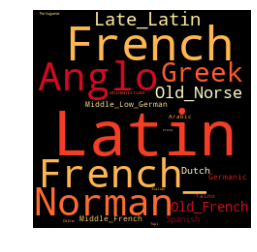

In [48]:
#Create Wordcloud
wordcloud0 = WordCloud(mask=british_mask,
                       height=600, width=600, 
                       background_color='black', 
                       colormap='YlOrRd',
                       collocations=False).generate(clean_names)
plt.imshow(wordcloud0, interpolation='bilinear')
plt.axis('off')
wordcloud0.to_file('Plot_b0.png')
plt.show()

In [12]:
#Globe Data
#Use this dataframe to create lats/lons for English Loaner Languages
merged_df = merged[['Name', 'Latitude', 'Longitude']].drop_duplicates()


In [62]:
all_data_df = merged_df.append({'Name' : 'English' , 'Latitude' : 52, 'Longitude': 0} , ignore_index=True)

In [64]:
all_data_df.to_csv(r'gio_globe')

In [65]:
all_data_df.to_json(r'gio_globe.json')